# Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


# Pre-processing Data

In [0]:
train = pd.read_csv('sign_mnist_train.csv')

In [0]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [0]:
#Separating labels and train data.
labels = train['label']
train = train.drop(['label'],axis=1)

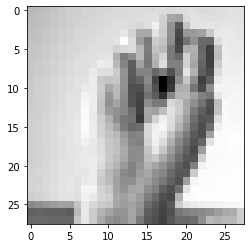

In [0]:
plt.imshow(train[0].reshape(28,28),cmap='gray')

In [0]:
#Binarizing labels
lbl_binarizer = LabelBinarizer()
labels = lbl_binarizer.fit_transform(labels)

In [0]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [0]:
#Performing a train-test split
#67% train data
#33% test data
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.33, random_state=42)

In [0]:
#Normalizing Data
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

# CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28, 28 ,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

W0929 23:58:55.669778 11132 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0929 23:58:55.682745 11132 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0929 23:58:55.684739 11132 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0929 23:58:55.701693 11132 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0929 23:58:55.753555 11132

In [0]:
model.fit(X_train,y_train,batch_size=120,epochs=20,validation_data=(X_test,y_test),verbose=1)

W0929 23:58:55.908370 11132 deprecation.py:323] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 18394 samples, validate on 9061 samples
Epoch 1/20
18394/18394 [==============================] - 5s 273us/step - loss: 2.5398 - acc: 0.2255 - val_loss: 1.4297 - val_acc: 0.5583
Epoch 2/20
18394/18394 [==============================] - 1s 63us/step - loss: 1.1412 - acc: 0.6155 - val_loss: 0.7267 - val_acc: 0.7766
Epoch 3/20
18394/18394 [==============================] - 1s 63us/step - loss: 0.7118 - acc: 0.7548 - val_loss: 0.4727 - val_acc: 0.8535
Epoch 4/20
18394/18394 [==============================] - 1s 64us/step - loss: 0.4719 - acc: 0.8417 - val_loss: 0.3144 - val_acc: 0.9044
Epoch 5/20
18394/18394 [==============================] - 1s 64us/step - loss: 0.3137 - acc: 0.8953 - val_loss: 0.1867 - val_acc: 0.9480
Epoch 6/20
18394/18394 [==============================] - 1s 64us/step - loss: 0.2159 - acc: 0.9301 - val_loss: 0.1947 - val_acc: 0.9369
Epoch 7/20
18394/18394 [==============================] - 1s 65us/step - loss: 0.1573 - acc: 0.9518 - val_loss: 0.0802 - val_acc

# Generating Results

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
y_test = [np.argmax(y_test[i]) for i in range(len(predictions))]

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       302
           2       1.00      1.00      1.00       378
           3       1.00      1.00      1.00       407
           4       1.00      1.00      1.00       320
           5       1.00      1.00      1.00       407
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       339
           8       1.00      1.00      1.00       392
           9       1.00      1.00      1.00       373
          10       1.00      1.00      1.00       424
          11       1.00      1.00      1.00       362
          12       1.00      1.00      1.00       377
          13       1.00      1.00      1.00       400
          14       1.00      1.00      1.00       349
          15       1.00      1.00      1.00       436
          16       1.00      1.00      1.00       432
          17       1.00    

In [0]:
print(accuracy_score(y_test,predictions))

0.9998896369054189


In [0]:
#Model Saved
model.save('MNIST_CNN.h5')